# **BLINKIT ANALYSIS PROJECT**

### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data

In [20]:
df = pd.read_excel(r"C:\Users\Admin\Downloads\blinkit data.xlsx")

### Sample Data

In [26]:
df.head(10)

,Item Fat Content,Sr.No.,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,1,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,2,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,3,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,4,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,5,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,6,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,7,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,8,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,9,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,10,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [28]:
df.tail()

,Item Fat Content,Sr.No.,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,8519,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,8520,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,8521,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,Regular,8522,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,Regular,8523,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### Size of Data

In [34]:
print("Size of Data", df.shape)

Size of Data (8523, 13)


### Field Info

In [39]:
df.columns

Index(['Item Fat Content', 'Sr.No.', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Field Datatypes

In [43]:
df.dtypes

Item Fat Content              object
Sr.No.                         int64
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [47]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat']


In [49]:
df["Item Fat Content"] = df["Item Fat Content"].replace("low fat","Low Fat")

In [55]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


### Business Requirements

### KPI's Requirements

In [65]:
# Total Sales
total_sales = df["Sales"].sum()

# Average Sales
average_sales = df["Sales"].mean()

# No of Item Sold
no_of_item_sold = df["Sales"].count()

# Average Rating 
average_rating = df["Rating"].mean()

In [87]:
# display KPI's
print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: $ {average_sales:,.0f}")
print(f"No of Item Sold: {no_of_item_sold:,.0f}")
print(f"Average Rating : {average_rating :,.1f}")

Total Sales: $1,201,681.5
Average Sales: $ 141
No of Item Sold: 8,523
Average Rating : 4.0


### Chart's Requirements

#### Total Sales by Fat Content

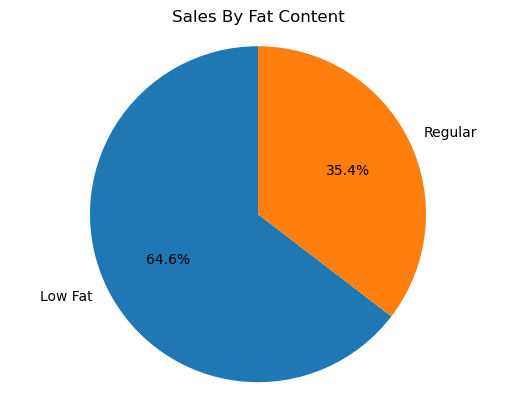

In [123]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
                     autopct = "%0.1f%%",
                  startangle = 90 
       )
plt.title("Sales By Fat Content")
plt.axis("equal")
plt.show()

#### Total Sales by Item Type

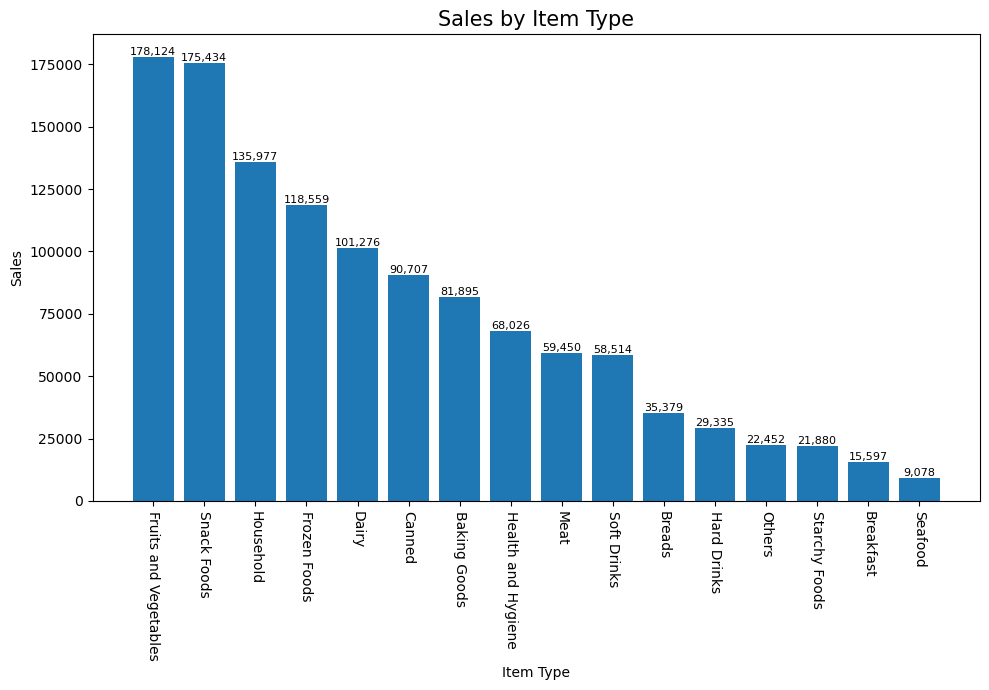

In [240]:
sales_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending = False)

plt.figure(figsize = (10,7))
bars = plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.title("Sales by Item Type", fontsize = 15)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha = "center", va = "bottom", fontsize = 8)

plt.tight_layout()
plt.show()



#### Fat Content by Outlet for Total Sales

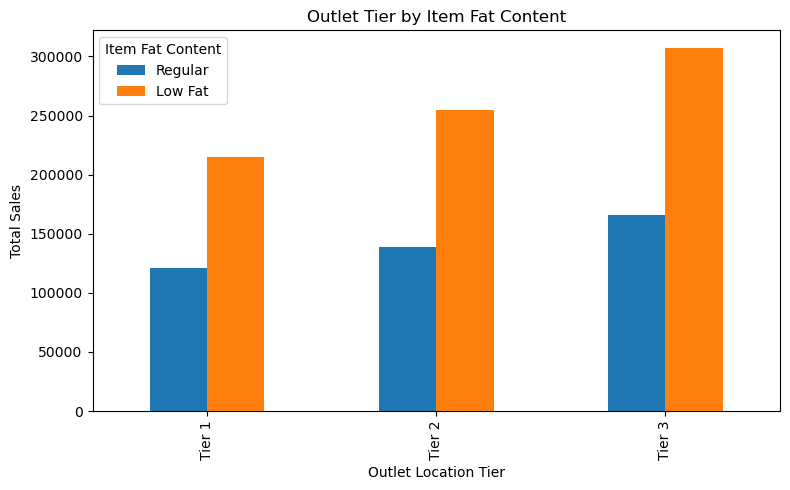

In [150]:
grouped = df.groupby(["Outlet Location Type","Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[["Regular","Low Fat"]]

ax = grouped.plot(kind = "bar",figsize = (8,5),title = "Outlet Tier by Item Fat Content")
plt.xlabel("Outlet Location Tier")
plt.ylabel("Total Sales")
plt.legend(title = "Item Fat Content")
plt.tight_layout()
plt.show()

In [162]:
group = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
group

Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 1,215047.9126,121349.8994
Tier 2,254464.7794,138685.8682
Tier 3,306697.1052,165435.9280


#### Total Sales by Outlet Establishment

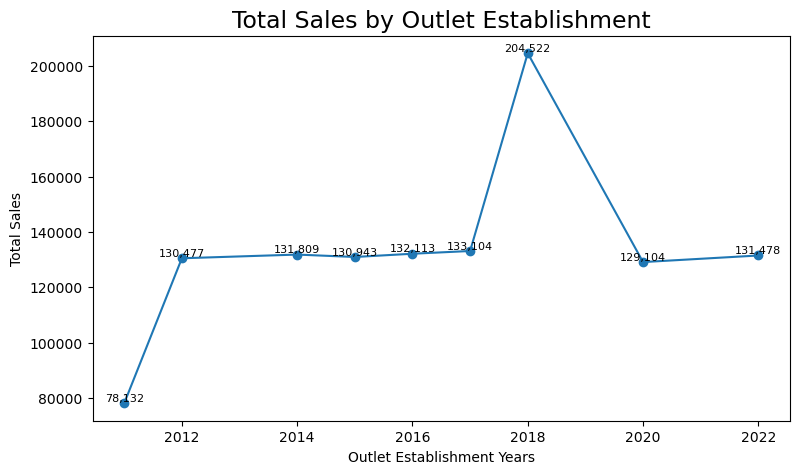

In [183]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()

plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker = "o", linestyle = "-")

plt.xlabel("Outlet Establishment Years")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet Establishment", fontsize = 17)

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f"{y:,.0f}",ha = "center", va= "bottom",fontsize = 8)

plt.show()

####  Sales by Outlet Size

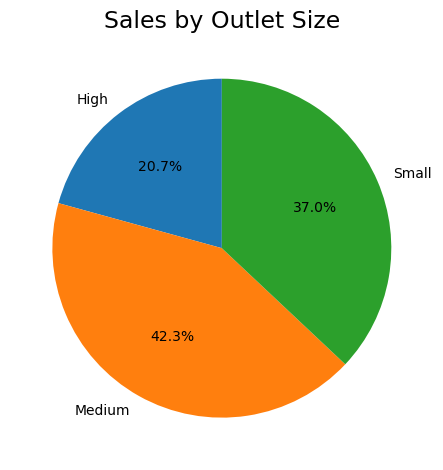

In [222]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()

plt.pie(sales_by_size,labels = sales_by_size.index, autopct = "%0.1f%%", startangle = 90)
plt.title("Sales by Outlet Size", fontsize = 17)
plt.tight_layout()
plt.show()

#### Sales by Outlet Location

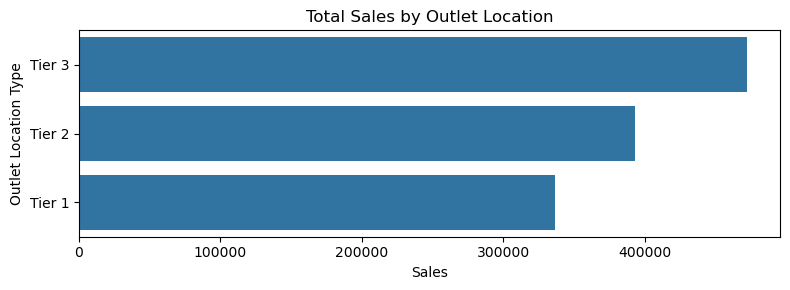

In [238]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values("Sales",ascending = False)

plt.figure(figsize = (8,3))
ax = sns.barplot(x = "Sales" , y = "Outlet Location Type", data = sales_by_location)

plt.title("Total Sales by Outlet Location")


plt.tight_layout()
plt.show()